In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/day.csv
/kaggle/input/bike-sharing-dataset/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/bike-sharing-dataset/day.csv


In [2]:
data = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')
print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data['DateTime'] = data[['dteday','hr']].apply(lambda x:x['dteday']+" "+str(x["hr"])+":00",axis=1)
data['DateTime'] = pd.to_datetime(data['DateTime'],format='%Y-%m-%d %H:%M')
data = data.set_index('DateTime')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
DateTime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data['day_of_month'] = data.index.day
data['day_of_week']  = data.index.dayofweek
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month,day_of_week
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,5
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,5
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,5
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,5
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,5


## Exploratory Data Analysis

One of the most importants conclusions from this dataset is how many bike shares occured over time.

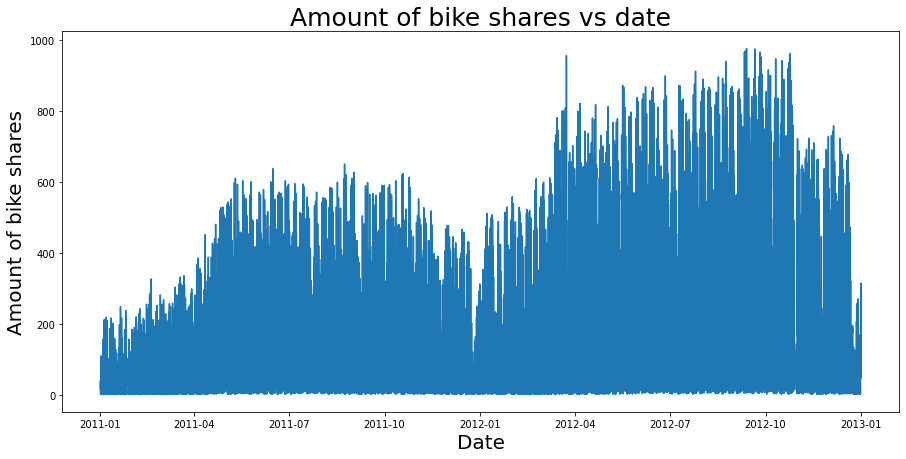

In [6]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(x=data.index,y=data.cnt)
ax.set_title("Amount of bike shares vs date",fontsize=25)
ax.set_xlabel("Date",fontsize=20)
ax.set_ylabel('Amount of bike shares',fontsize=20)
plt.show()

The plot above shows the bike shares across the time. Even though it shows alls the bike sales it's hard to gain insights from it.

**Amount of bike shares per month**

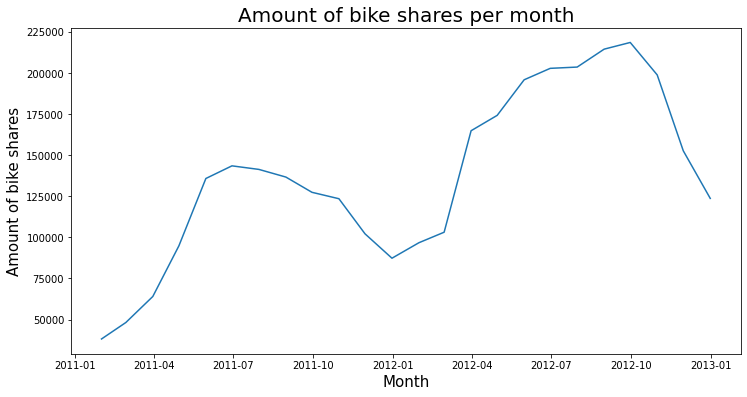

In [7]:
data_by_month = data.resample("M").sum()
plt.figure(figsize=(12,6))
ax = sns.lineplot(x=data_by_month.index,y=data_by_month.cnt)
ax.set_title("Amount of bike shares per month",fontsize=20)
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.show()

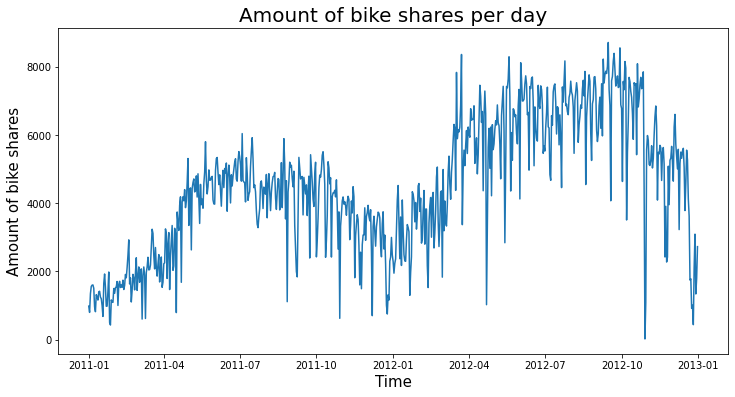

In [8]:
data_by_week = data.resample("D").sum()
plt.figure(figsize=(12,6))
ax = sns.lineplot(x=data_by_week.index,y=data_by_week.cnt)
ax.set_title("Amount of bike shares per day",fontsize=20)
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.show()

We can clearly notice a dip in shares around the winter period of each year. When the year progress bike shares are increasing towards the summer months.

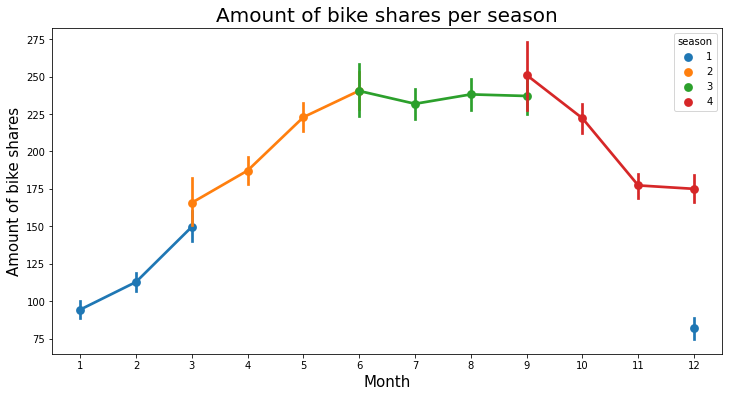

In [9]:
plt.figure(figsize=(12,6))
ax = sns.pointplot(x=data.mnth,y=data.cnt,hue=data.season)
ax.set_title("Amount of bike shares per season",fontsize=20)
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.show()

It's clear that more bikes are rented in summer time then winter time.

**Amount of bike shares in a week**

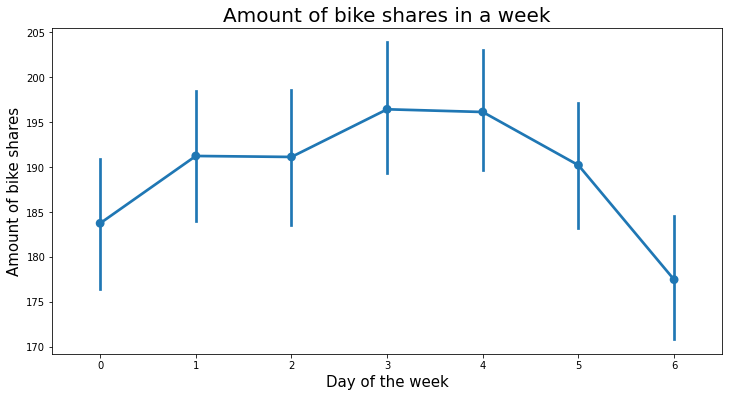

In [10]:
plt.figure(figsize=(12,6))
ax = sns.pointplot(x=data.day_of_week,y=data.cnt)
ax.set_title("Amount of bike shares in a week",fontsize=20)
ax.set_xlabel("Day of the week",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.show()

If we look over a timespan from one week it's clear that less bikes are rented within the weekend.

**Amount of bike shares in a day**

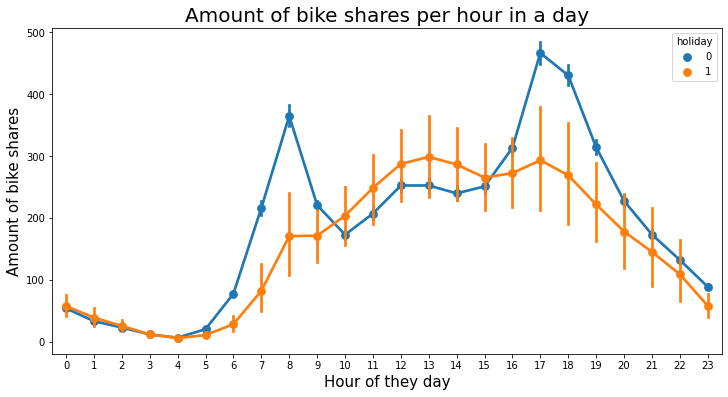

In [11]:
plt.figure(figsize=(12,6))
ax = sns.pointplot(x=data.hr,y=data.cnt,hue=data.holiday)
ax.set_title("Amount of bike shares per hour in a day",fontsize=20)
ax.set_xlabel("Hour of they day",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.show()

It's clear that on a normal day most bikes are rented within the rush hour peaks. On a holiday this clearly changes, the rush hour peaks are not present and most bikes ar rented in the afternoon.

It can be concluded that's there a distinct difference in shares when it's not a working day. If this trend is true, we should also see it occuring in the weekend.

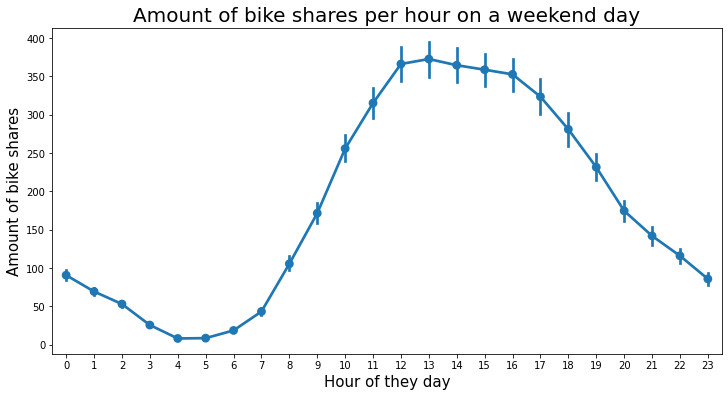

In [12]:
plt.figure(figsize=(12,6))
ax = sns.pointplot(data=data[data['workingday']==0],x='hr',y='cnt')
ax.set_title("Amount of bike shares per hour on a weekend day",fontsize=20)
ax.set_xlabel("Hour of they day",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.show()

The trend above confirms the difference between bike shares on normal working days versus holidays.

**Amount of bike shares related to temperature**

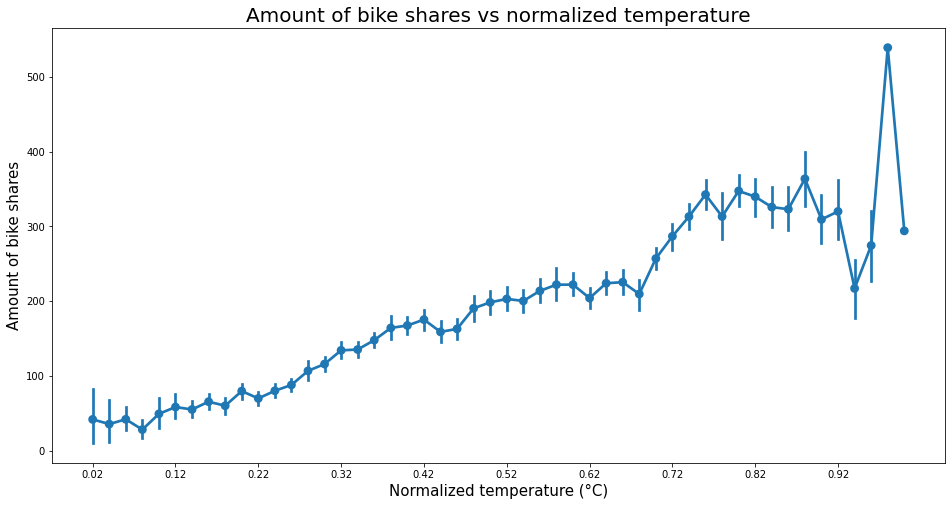

In [13]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(x=data.temp,y=data.cnt)
ax.set_title("Amount of bike shares vs normalized temperature",fontsize=20)
ax.set_xlabel("Normalized temperature (°C)", fontsize=15)
ax.set_ylabel('Amount of bike shares', fontsize=15)
plt.locator_params(axis='x',nbins=10)

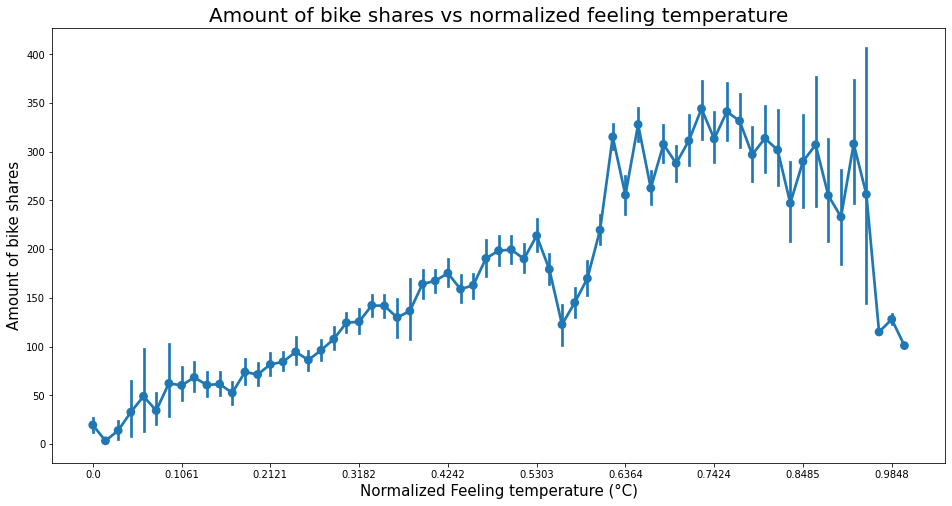

In [14]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(x=data.atemp,y=data.cnt)
ax.set_title("Amount of bike shares vs normalized feeling temperature",fontsize=20)
ax.set_xlabel("Normalized Feeling temperature (°C)",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.locator_params(axis='x',nbins=10)

Like we tought it's clear that people rent more bikes when the temperature is high. Next to this we see a high correlation between the real and the feelings temperature.

**Amount of bike shares related to the humidity**

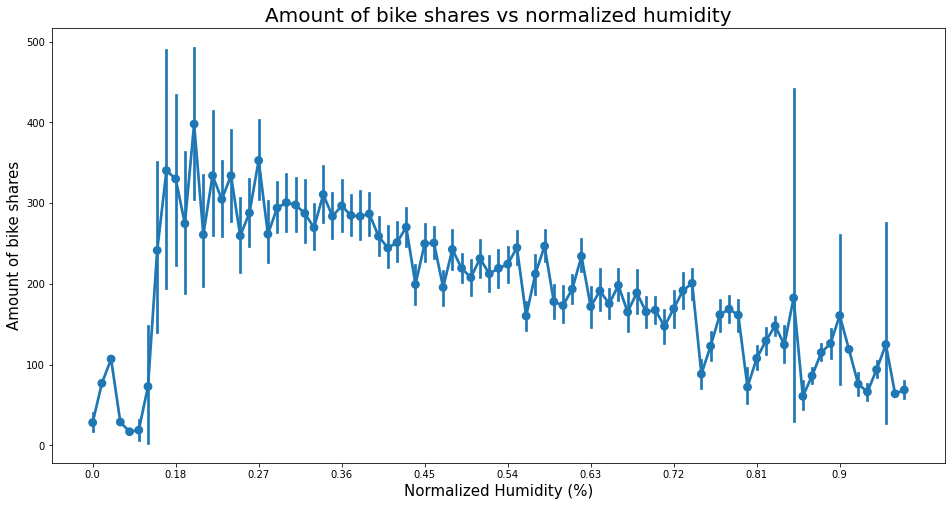

In [15]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(x=data.hum,y=data.cnt)
ax.set_title("Amount of bike shares vs normalized humidity",fontsize=20)
ax.set_xlabel("Normalized Humidity (%)",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.locator_params(axis='x',nbins=10)

An increase in humidity results in a decrease of the bikes shared.

**Amount of bike shares related to the windspeed**

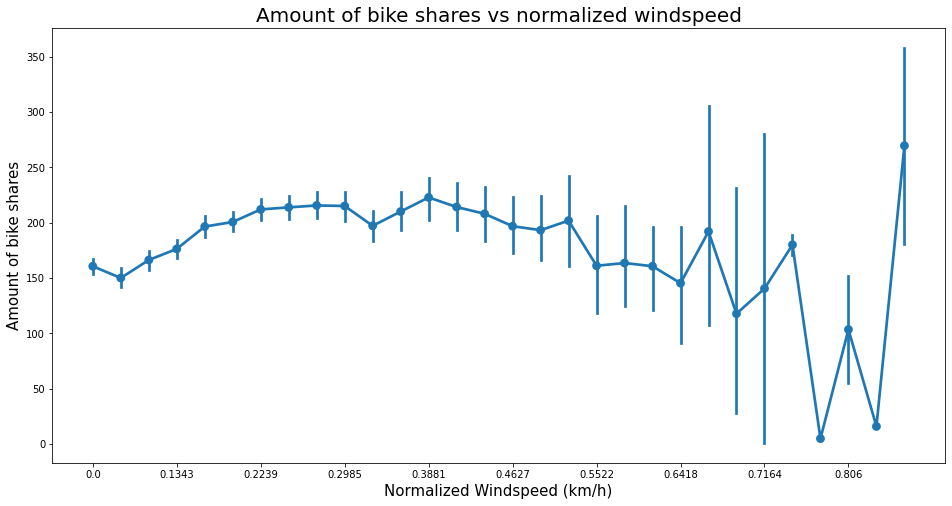

In [16]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(x=data.windspeed,y=data.cnt)
ax.set_title("Amount of bike shares vs normalized windspeed",fontsize=20)
ax.set_xlabel("Normalized Windspeed (km/h)",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)
plt.locator_params(axis='x',nbins=10)

**Amount of bike shares related to the weather**

Text(0, 0.5, 'Amount of bike shares')

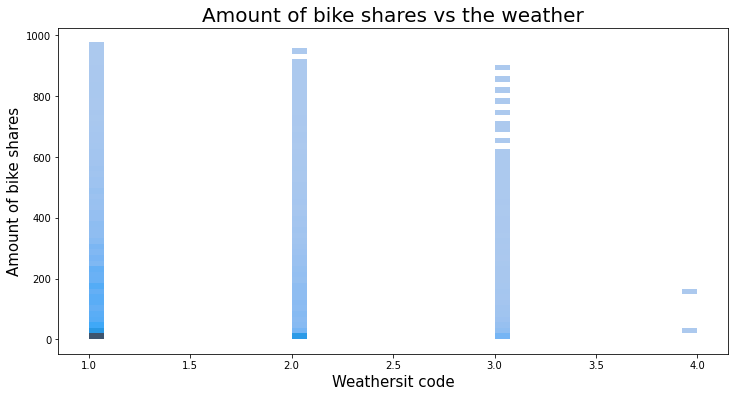

In [17]:
plt.figure(figsize=(12,6))
ax = sns.histplot(x=data.weathersit,y=data.cnt)
ax.set_title("Amount of bike shares vs the weather",fontsize=20)
ax.set_xlabel("Weathersit code",fontsize=15)
ax.set_ylabel('Amount of bike shares',fontsize=15)

It's clear that when the weather is good (1,2,3) more bikes are rented then when the weather is bad (4)

**Feature correlations**

<AxesSubplot:>

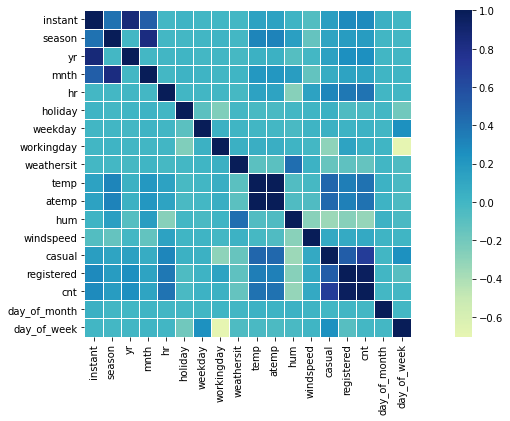

In [18]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0)

## LSTM Modelling

In [19]:
df = data.copy()
df = df[['season','mnth','hr','holiday','workingday','weathersit','temp','atemp','hum','windspeed','cnt','day_of_month','day_of_week']]
df.head()

,season,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_month,day_of_week
DateTime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,0,0,1,0.24,0.2879,0.81,0.0,16,1,5
2011-01-01 01:00:00,1,1,1,0,0,1,0.22,0.2727,0.80,0.0,40,1,5
2011-01-01 02:00:00,1,1,2,0,0,1,0.22,0.2727,0.80,0.0,32,1,5
2011-01-01 03:00:00,1,1,3,0,0,1,0.24,0.2879,0.75,0.0,13,1,5
2011-01-01 04:00:00,1,1,4,0,0,1,0.24,0.2879,0.75,0.0,1,1,5


In [20]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.1,random_state=0)

print(train.shape)
print(test.shape)

(15641, 13)
(1738, 13)


In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = RobustScaler()
num_colu = ['temp', 'atemp', 'hum', 'windspeed']
trans_1 = scaler.fit(train[num_colu].to_numpy())
train.loc[:,num_colu] = trans_1.transform(train[num_colu].to_numpy())
test.loc[:,num_colu] = trans_1.transform(test[num_colu].to_numpy())

cnt_scaler = MinMaxScaler()
trans_2 = cnt_scaler.fit(train[['cnt']])
train['cnt'] = trans_2.transform(train[['cnt']])
test['cnt'] = trans_2.transform(test[['cnt']])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [22]:
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
def prepare_data(X,y,time_steps=1):
    Xs = []
    Ys = []
    for i in tqdm(range(len(X) - time_steps)):
        a = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(a)
        Ys.append(y.iloc[i+time_steps])
    return np.array(Xs),np.array(Ys)    

steps=24
X_train , y_train = prepare_data(train,train.cnt,time_steps=steps)
X_test , y_test = prepare_data(test,test.cnt,time_steps=steps)
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test: {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/15617 [00:00<?, ?it/s]

  0%|          | 0/1714 [00:00<?, ?it/s]

X_train : (15617, 24, 13)
X_test : (1714, 24, 13)
y_train : (15617,)
y_test: (1714,)


In [23]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 

model = Sequential()
model.add(Bidirectional(LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam",loss="mse")

history = model.fit(X_train,y_train,epochs=100,batch_size=24,validation_split=0.1,shuffle=True)
history

model.summary()

Epoch 1/100
586/586 [==============================] - 13s 15ms/step - loss: 0.0891 - val_loss: 0.0363
Epoch 2/100
586/586 [==============================] - 8s 14ms/step - loss: 0.0374 - val_loss: 0.0360
Epoch 3/100
586/586 [==============================] - 8s 14ms/step - loss: 0.0358 - val_loss: 0.0364
Epoch 4/100
586/586 [==============================] - 8s 14ms/step - loss: 0.0344 - val_loss: 0.0360
Epoch 5/100
586/586 [==============================] - 8s 13ms/step - loss: 0.0353 - val_loss: 0.0360
Epoch 6/100
586/586 [==============================] - 8s 13ms/step - loss: 0.0348 - val_loss: 0.0360
Epoch 7/100
586/586 [==============================] - 8s 14ms/step - loss: 0.0351 - val_loss: 0.0360
Epoch 8/100
586/586 [==============================] - 8s 13ms/step - loss: 0.0339 - val_loss: 0.0361
Epoch 9/100
586/586 [==============================] - 8s 13ms/step - loss: 0.0344 - val_loss: 0.0359
Epoch 10/100
586/586 [==============================] - 8s 14ms/step - loss: 0.03

**Demand Predictions**

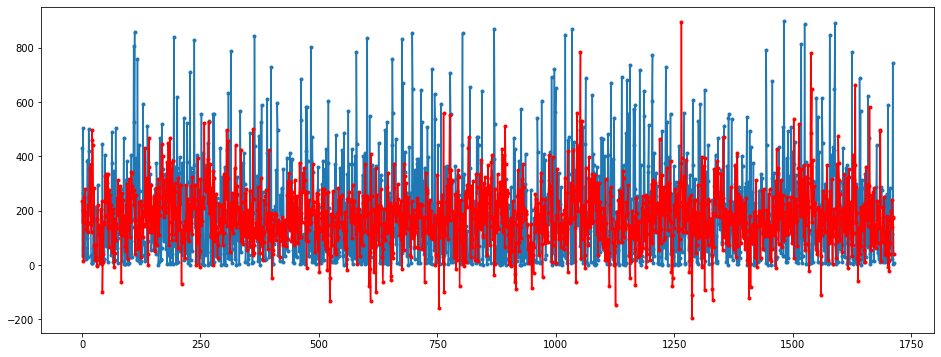

In [24]:
pred = model.predict(X_test)

y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
pred_inv = cnt_scaler.inverse_transform(pred)

plt.figure(figsize=(16,6))
plt.plot(y_test_inv.flatten(),marker=".",label="actual")
plt.plot(pred_inv.flatten(),marker=".",label="prediction",color="r")

In [25]:
y_test_actual = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
y_test_pred = cnt_scaler.inverse_transform(pred)

arr_1 = np.array(y_test_actual)
arr_2 = np.array(y_test_pred)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [26]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,431.0,236.955276
1,33.0,158.636505
2,505.0,201.066498
3,267.0,15.660639
4,243.0,182.722473


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(final.actual,final.predicted)) 
r2 = r2_score(final.actual,final.predicted) 
print("rmse is : {}\nr2 is : {}".format(rmse,r2))

rmse is : 211.75342518553498
r2 is : -0.4040452098833951


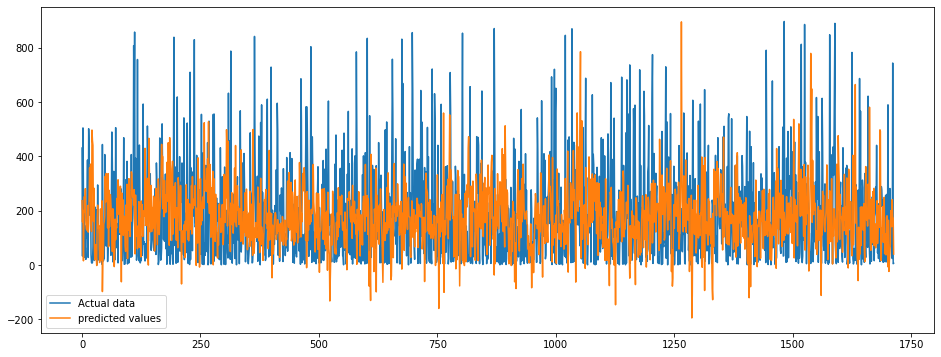

In [28]:
plt.figure(figsize=(16,6))
plt.plot(final.actual,label="Actual data")
plt.plot(final.predicted,label="predicted values")
plt.legend(loc="best")